In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [23]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [24]:
seed_dataset = pd.read_csv('seeds_dataset.csv')

In [25]:
seed_dataset.head()

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymmetryCoefficient,KernelGrooveLength,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [26]:
seed_dataset.tail()

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymmetryCoefficient,KernelGrooveLength,Class
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [27]:
seed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  210 non-null    float64
 1   Perimeter             210 non-null    float64
 2   Compactness           210 non-null    float64
 3   KernelLength          210 non-null    float64
 4   KernelWidth           210 non-null    float64
 5   AsymmetryCoefficient  210 non-null    float64
 6   KernelGrooveLength    210 non-null    float64
 7   Class                 210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [28]:
seed_dataset.describe()

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymmetryCoefficient,KernelGrooveLength,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


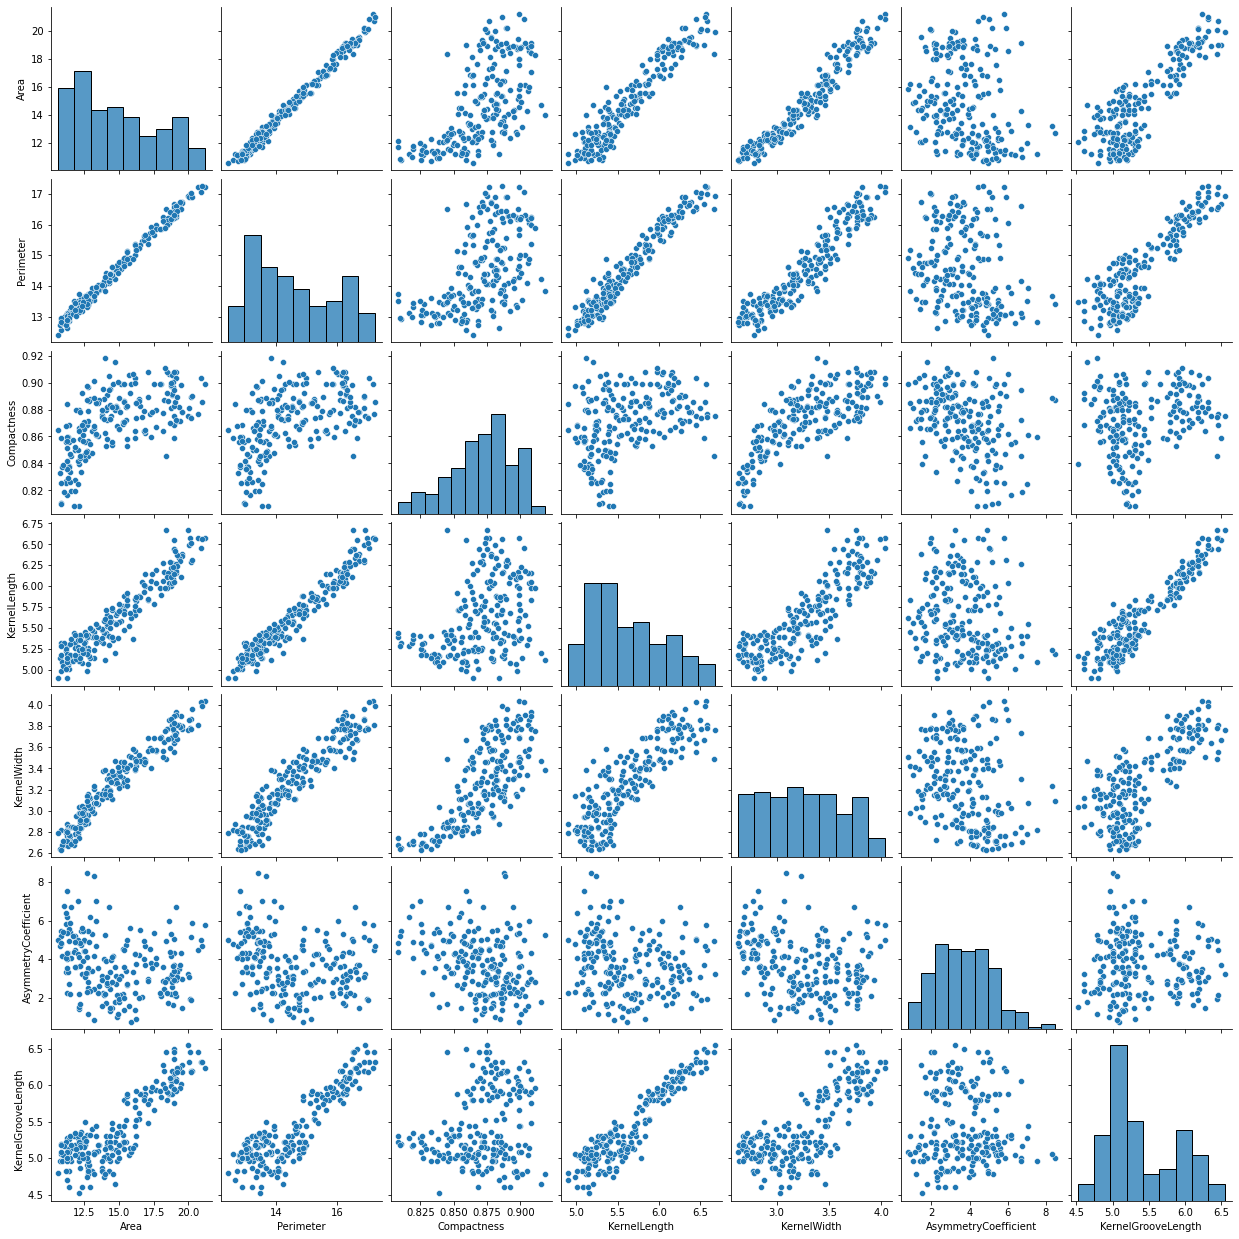

In [29]:
sns.pairplot(seed_dataset.iloc[:,[0,1,2,3,4,5,6]])

In [30]:
from sklearn.preprocessing import StandardScaler
x = seed_dataset.iloc[:, 0:7].values
sc_x = StandardScaler() 
x = sc_x.fit_transform(x)

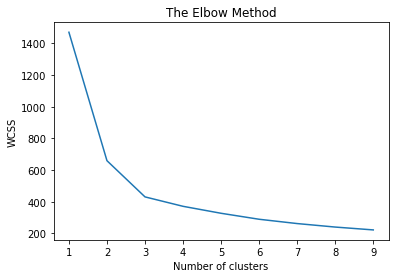

In [31]:
#Elbow method to find number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans (n_clusters =i, init = 'k-means++', random_state = 98)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters') 
plt.ylabel('WCSS')

plt.show()

In [32]:
#k-means
kmeans = KMeans (n_clusters = 3, init = 'k-means++', random_state = 98) 
y_kmeans = kmeans.fit_predict(x)

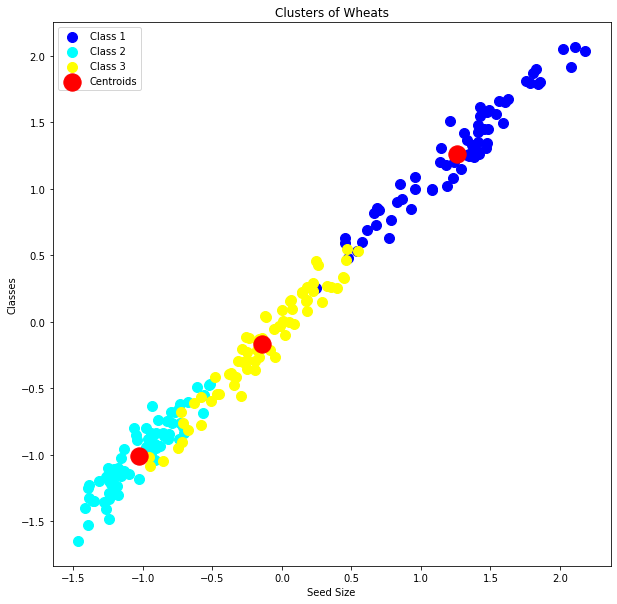

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s =100, c = 'blue', label = 'Class 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s =100, c = 'cyan', label = 'Class 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s =100, c = 'yellow', label = 'Class 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Clusters of Wheats')
plt.xlabel('Seed Size')
plt.ylabel('Classes')
plt.legend()
plt.show()

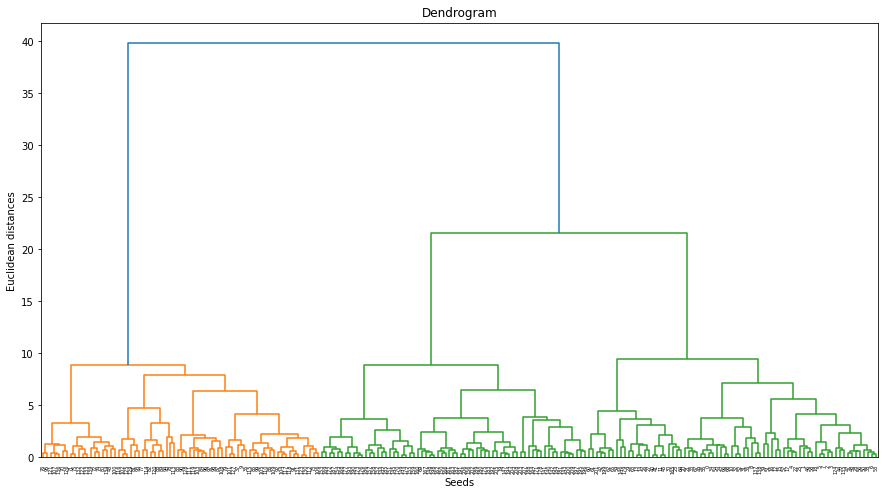

In [36]:
#dengrogram to find number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,8))
dendrogram =sch.dendrogram(sch.linkage(x,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Seeds')
plt.ylabel('Euclidean distances')
plt.show()

In [42]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
HClustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_HClustering = HClustering.fit_predict(x)

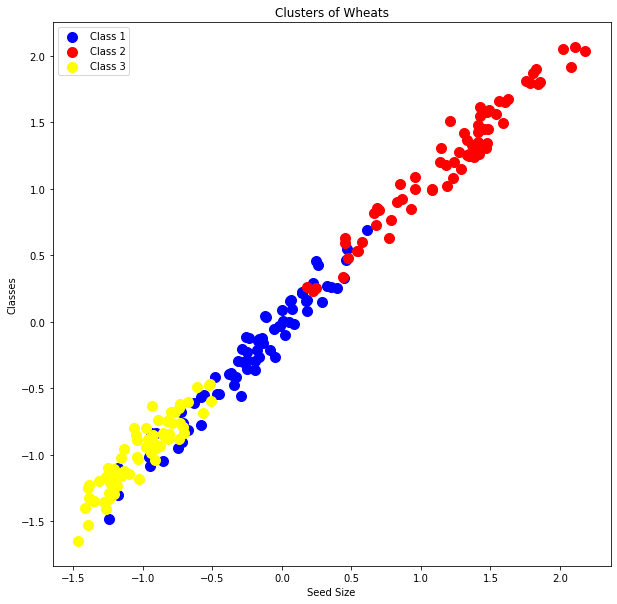

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(x[y_HClustering == 0, 0], x[y_HClustering == 0, 1], s =100, c = 'blue', label = 'Class 1')
plt.scatter(x[y_HClustering == 1, 0], x[y_HClustering == 1, 1], s =100, c = 'red', label = 'Class 2')
plt.scatter(x[y_HClustering == 2, 0], x[y_HClustering == 2, 1], s =100, c = 'yellow', label = 'Class 3')
plt.title('Clusters of Wheats')
plt.xlabel('Seed Size')
plt.ylabel('Classes')
plt.legend()
plt.show()